In [1]:
pip install sktime

     |████████████████████████████████| 6.5 MB 4.5 MB/s 
     |████████████████████████████████| 9.8 MB 34.4 MB/s 
     |████████████████████████████████| 3.3 MB 32.4 MB/s 
     |████████████████████████████████| 34.5 MB 8.1 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [90]:
from sktime.utils.plotting import plot_series
import pandas as pd
from sktime.forecasting.model_selection import temporal_train_test_split
#from sktime.performance_metrics.forecasting import smape_loss
import matplotlib.pyplot as plt

%matplotlib inline

In [91]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [92]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
1,2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2,2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
3,2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
4,2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000


In [93]:
# Important step to make the model work - Set the Date column as Index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)
df.index = pd.PeriodIndex(df.index, freq="D")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-16,394.518005,398.807007,373.070007,382.556000,382.556000,26990000
2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000


In [94]:
# Holtwinters - won't use it
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np

from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.80700013]


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2709 entries, 2014-10-16 to 2022-03-16
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2709 non-null   float64
 1   High       2709 non-null   float64
 2   Low        2709 non-null   float64
 3   Close      2709 non-null   float64
 4   Adj Close  2709 non-null   float64
 5   Volume     2709 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 148.1 KB


In [97]:
data = np.asarray(df)
#model = SimpleExpSmoothing(data)

In [98]:
data

array([[3.94518005e+02, 3.98807007e+02, 3.73070007e+02, 3.82556000e+02,
        3.82556000e+02, 2.69900000e+07],
       [3.82756012e+02, 3.85477997e+02, 3.75389008e+02, 3.83757996e+02,
        3.83757996e+02, 1.36007000e+07],
       [3.83976013e+02, 3.95157990e+02, 3.78971008e+02, 3.91441986e+02,
        3.91441986e+02, 1.14168000e+07],
       ...,
       [3.78463164e+04, 3.97425000e+04, 3.76807344e+04, 3.96667539e+04,
        3.96667539e+04, 2.43221591e+10],
       [3.96642500e+04, 3.97946289e+04, 3.83102109e+04, 3.93387852e+04,
        3.93387852e+04, 2.39340009e+10],
       [3.93046211e+04, 4.14654531e+04, 3.90414688e+04, 4.07699375e+04,
        4.07699375e+04, 3.71744891e+10]])

In [99]:
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df), len(df))
# yhat = model_fit.predict(len(data), len(data))
print(yhat)

[99.80700013]


**Another approach - Nice approach, study it in depth and check results, consider deleting the data from 2014 to 2018. Most likely using this one in the project. Evaluation will be placed in the end of this file!**

In [100]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [101]:
train, test = temporal_train_test_split(df, test_size = 36)

In [102]:
fh = list(range(1,37))

In [103]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [104]:
#train.drop(['Date'])
train.head()

,Close
Date,
2014-10-16,382.556000
2014-10-17,383.757996
2014-10-18,391.441986
2014-10-19,389.545990
2014-10-20,382.845001


In [105]:
simple_exp.fit(train)

ExponentialSmoothing()

In [106]:
pred = simple_exp.predict(fh)

In [107]:
pred

,Close
2022-02-09,44110.811096
2022-02-10,44110.811096
2022-02-11,44110.811096
2022-02-12,44110.811096
2022-02-13,44110.811096
2022-02-14,44110.811096
2022-02-15,44110.811096
2022-02-16,44110.811096
2022-02-17,44110.811096
2022-02-18,44110.811096


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa759991890>)

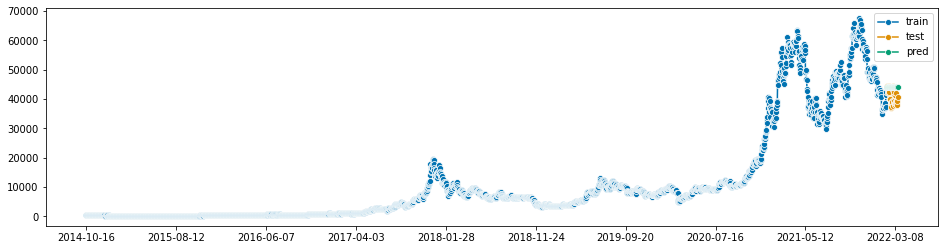

In [108]:
plot_series(train, test, pred, labels = ["train", "test", "pred"])

Another approach - Think about this one a bit more


In [109]:
# 1
import statsmodels.api as sm
import pandas as pd
import matplotlib as plt
import numpy as np
from datetime import datetime


In [85]:
# 2
df = pd.read_csv("BTC-USD.csv")

In [86]:
# df.drop(['Date'], axis=1, inplace=True)

In [87]:
# 3
# df["Date"] = pd.to_datetime(df["Date"])

In [88]:
# df1 = np.asarray(df)

In [113]:
# 4
# df = df.reset_index().resample('D', on="Date")['Open'].mean()

In [110]:
# 5
mod = sm.tsa.ExponentialSmoothing(
 endog=df, trend='add'
 )
res = mod.fit()

In [111]:
# 6
forecasts = pd.Series(res.forecast(steps=31))

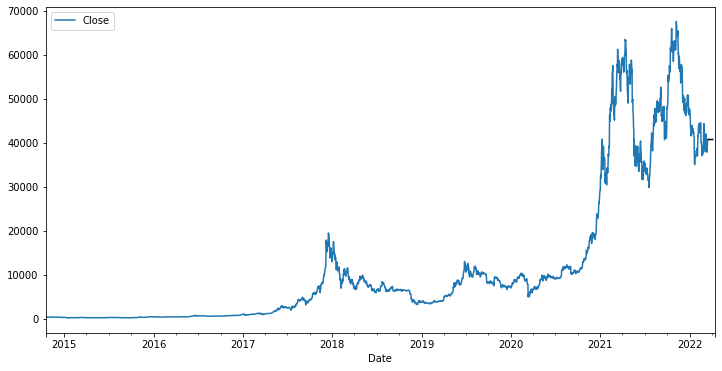

In [112]:
# 7
ax = df.plot(figsize=(12, 6))
#plt.ylabel('SPY')
forecasts.plot(style='k--')

A small and quick try with SilverKite - Do not use this one in the project

In [66]:
pip install greykite

     |████████████████████████████████| 21.9 MB 1.2 MB/s 
     |████████████████████████████████| 95 kB 3.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 297 kB 63.3 MB/s 
     |████████████████████████████████| 2.8 MB 41.0 MB/s 
     |████████████████████████████████| 1.4 MB 47.9 MB/s 
     |████████████████████████████████| 9.9 MB 57.1 MB/s 
     |████████████████████████████████| 211 kB 56.7 MB/s 
     |████████████████████████████████| 11.2 MB 41.9 MB/s 
     |████████████████████████████████| 899 kB 44.8 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Success

In [67]:
from greykite.framework.templates.autogen.forecast_config import (
 ForecastConfig, MetadataParam
)
metadata = MetadataParam(
 time_col="date",
 value_col="new_cases",
 freq="W"
)

In [68]:
pip install Forecaster

     |████████████████████████████████| 462 kB 4.1 MB/s 
  Created wheel for Forecaster: filename=forecaster-0.2-py3-none-any.whl size=14052 sha256=929c4a585c15ec54e8927822f70c60eae157deb1ef0df68805684a1cbd15ef4e
  Stored in directory: /root/.cache/pip/wheels/40/d3/25/99c63ca72006fca65568ea197cbe269a28893cee13b1fd83b8
Successfully built Forecaster


In [70]:
df.reset_index()

,Date,Close
0,2014-10-16,382.556000
1,2014-10-17,383.757996
2,2014-10-18,391.441986
3,2014-10-19,389.545990
4,2014-10-20,382.845001
...,...,...
2704,2022-03-12,38904.011719
2705,2022-03-13,37849.664063
2706,2022-03-14,39666.753906
2707,2022-03-15,39338.785156


In [ ]:
# Check error from it
import warnings
from greykite.framework.templates.forecaster import Forecaster
from greykite.framework.templates.model_templates import ModelTemplateEnum

forecaster = Forecaster()
warnings.filterwarnings("ignore", category=UserWarning)
result = forecaster.run_forecast_config(
    df=df,
    config=ForecastConfig(
    model_template=ModelTemplateEnum.SILVERKITE_DAILY_90.name,
    forecast_horizon=90,
    coverage=0.95,
    metadata_param=metadata
  )
 ) 

In [ ]:
forecast = result.forecast
forecast.plot().show(renderer="colab")

In [ ]:
# Create function to read dataset and run prediction automatically


# Create function to evaluate the model and its accuracy

